In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import copy

In [2]:
data1= pd.read_excel("./data/Adherencia.xlsx")
data2= pd.read_excel('./data/Antecedentes_patologicos.xlsx')
data3= pd.read_excel('./data/Hospitalizaciones.xlsx')

# Initial overview

print(data1.info())#adherencia
data1.info()


In [3]:
print(data2.info())#Antecedentes_patologicos
data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DS_IDENTIFICACION  2086 non-null   int64         
 1   EPS                2086 non-null   object        
 2   FE_ACTUALIZA       2086 non-null   datetime64[ns]
 3   FE_INICIO          2034 non-null   datetime64[ns]
 4   FE_FIN             148 non-null    datetime64[ns]
 5   DS_OBSERVACIONES   58 non-null     object        
 6   Diagnostico        2085 non-null   object        
 7   CodDiagnostico     2085 non-null   object        
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 130.5+ KB
None


,DS_IDENTIFICACION,EPS,FE_ACTUALIZA,FE_INICIO,FE_FIN,DS_OBSERVACIONES,Diagnostico,CodDiagnostico
0,653834,EPS/SURA,2010-10-10,2010-10-09,NaT,NaN,TRASPLANTE DE CORAZON,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,OTRAS DERMATITIS ATOPICAS,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,"RINITIS ALERGICA, NO ESPECIFICADA",J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,NaT,NaN,ASMA PREDOMINANTEMENTE ALERGICA,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,CHOQUE ANAFILACTICO DEBIDO A REACCION ADVERSA ...,T780
...,...,...,...,...,...,...,...,...
2081,1370054,EPS/SURA,2020-03-24,2020-03-24,NaT,NaN,URTICARIA ALERGICA,L500
2082,1370054,EPS/SURA,2020-04-28,2020-04-28,NaT,NaN,URTICARIA IDIOPATICA,L501
2083,1370148,EPS/SURA,2020-03-27,2017-03-18,NaT,NaN,"URTICARIA, NO ESPECIFICADA",L509
2084,1311280,EPS/SURA,2020-03-27,2020-03-20,NaT,NaN,URTICARIA IDIOPATICA,L501


In [4]:
print(data3.info())#Hospitalizaciones
data3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Id                                1750 non-null   int64 
 1   Sexo                              1750 non-null   object
 2   EDAD (Años)                       1750 non-null   int64 
 3   Id Diagnostico Egreso             1705 non-null   object
 4   Descripción diagnostico (egreso)  1750 non-null   object
 5   Dias Uci                          1750 non-null   int64 
 6   Dias Uce                          1750 non-null   int64 
 7   Días de Estancia (Calculada)      1750 non-null   int64 
 8   Fecha Ingreso                     1750 non-null   int64 
 9   Fecha Egreso                      1750 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 136.8+ KB
None


,Id,Sexo,EDAD (Años),Id Diagnostico Egreso,Descripción diagnostico (egreso),Dias Uci,Dias Uce,Días de Estancia (Calculada),Fecha Ingreso,Fecha Egreso
0,1381384,Femenino,43,R060,DISNEA,0,0,0,43973,43973
1,1118363,Masculino,6,R060,DISNEA,0,0,0,43832,43832
2,1118363,Masculino,6,R060,DISNEA,0,0,0,43832,43832
3,978163,Masculino,12,E848,FIBROSIS QUÍSTICA CON OTRAS MANIFESTACIONES,0,0,0,43608,43608
4,1140753,Masculino,31,J459,"ASMA, NO ESPECIFICADA",0,0,0,43334,43334
...,...,...,...,...,...,...,...,...,...,...
1745,1772651,Femenino,67,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON EX...,0,1,13,42774,42787
1746,664514,Femenino,36,J459,"ASMA, NO ESPECIFICADA",0,0,8,42779,42787
1747,1391509,Femenino,4,J459,"ASMA, NO ESPECIFICADA",0,0,2,42785,42787
1748,1339118,Masculino,81,J459,"ASMA, NO ESPECIFICADA",0,0,9,42785,42794


In [5]:
Adher = copy.deepcopy(data1)  
Pato  = copy.deepcopy(data2)  
Hosp  = copy.deepcopy(data3)  

-------------------------

# 1 . Adherencia

In [6]:
###### Rename the columns ############

Adher.rename(columns={'ds_identificacion':'id_patient',
                         'FE_ENTREVISTA':'survey_date',
                          'Morisky_Green':'morisky_green',
                          'Smaq1':'smaq1',
                          'Smaq2':'smaq2',
                          'Espa':'espa',
                          'Cualitativo_ponderado':'qualitative_result',
                          'Cuantitativo_ponderado': 'quantitative_result'
                      }, 
            inplace=True)

##### Set date as pandas type ########

Adher['survey_date']=pd.to_datetime(Adher['survey_date'])
Adher.sort_values(by=['survey_date'],ascending= True, inplace=True)

#### Drop duplicate rows ########

Adher.drop_duplicates(keep='first',inplace=True)
Adher.reset_index(drop= True, inplace=True)
Adher

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
0,529410,2012-04-19,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
1,1101180,2012-04-24,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,4.0,NO ADHERENTE,95-100%
2,1053118,2012-05-03,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
3,1198956,2012-05-16,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
4,605968,2012-05-17,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,5.0,NO ADHERENTE,95-100%
...,...,...,...,...,...,...,...,...,...
5222,1126622,2020-05-20,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5223,628557,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5224,1970331,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5225,1519090,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%


In [7]:
print('Number of unique "ds_identificacion" : ', Adher['id_patient'].unique().size )
print('Range of data: From 10/JAN/2012 to 05/DEC/2020')

Number of unique "ds_identificacion" :  849
Range of data: From 10/JAN/2012 to 05/DEC/2020


In [8]:
df1 = Adher[Adher.isna().any(axis=1)]
df1

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
83,667026,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,716377,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,832593,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1491934,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,514102,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,845676,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,846434,2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689,767551,2016-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,1898392,2016-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2557,1505589,2017-09-12,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [9]:
Adher['morisky_green'].unique()

array(['NO ADHERENTE', 'ADHERENTE', 'NO APLICA', nan], dtype=object)

In [10]:
#Replace 'No aplica' for nan
#Reevaluate rows with nan
Adher.replace('NO APLICA', np.nan, inplace=True)
df1 = Adher[Adher.isna().any(axis=1)]  
df1 #Show dataframe with missing values.

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
81,852244,2013-04-03,NaN,NaN,NaN,NaN,0.0,NaN,NaN
83,667026,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,716377,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,832593,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1491934,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4896,843484,2020-02-07,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4898,709830,2020-02-11,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4994,1715733,2020-03-13,NaN,NaN,NaN,NaN,0.0,NaN,NaN
5008,1311280,2020-03-20,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [11]:
missed_appointments = df1; #Rename missed appointments
print(df1['morisky_green'].unique())
print(df1['smaq1'].unique())
print(df1['smaq2'].unique())
print(df1['espa'].unique())
print(df1['nm_espa'].unique())
print(df1['qualitative_result'].unique())
print(df1['quantitative_result'].unique())

[nan]
[nan]
[nan]
[nan]
[ 0. nan]
[nan]
[nan]


In [12]:
Adher=Adher.dropna(subset=['morisky_green','smaq1','smaq2','espa','nm_espa','qualitative_result','quantitative_result'])

In [13]:
Adher = Adher.replace('ADHERENTE', 'si');
Adher = Adher.replace('NO ADHERENTE', 'no');

In [14]:
Adher1 = copy.deepcopy(Adher) 
Adher1.set_index(['id_patient', 'survey_date'], inplace=True)
Adher1.sort_index(inplace=True)
Adher1.head(30)

morisky_green smaq1    smaq2 espa  nm_espa  \
id_patient survey_date                                              
500547     2016-07-11             si    si  95-100%   si      6.0   
           2019-03-14             si    si  95-100%   si      6.0   
           2019-10-11             si    si  95-100%   si      6.0   
           2019-12-09             si    si  95-100%   si      6.0   
           2020-01-16             si    si  95-100%   si      6.0   
           2020-03-25             si    si  95-100%   si      6.0   
           2020-05-08             si    si  95-100%   si      5.0   
500588     2019-04-26             si    si  95-100%   si      6.0   
502989     2014-08-22             no    no   64-84%   si      5.0   
           2014-10-28             no    no   64-84%   no      5.0   
           2014-11-21             si    si  95-100%   no      5.0   
           2015-01-07             no    si   85-94%   no      5.0   
           2015-01-14             si    si   85-94%   no      5.0   
           2015-06-25             si    si  95-100%   si      6.0   
           2016-01-12             no    no   85-94%   si      6.0   
           2016-01-15             si    si  95-100%   si      6.0   
           2017-01-03             no    no   85-94%   si      6.0   
           2017-03-21             si    si  95-100%   si      6.0   
           2017-07-10             si    si  95-100%   si      6.0   
           2017-08-08             si    si  95-100%   si      6.0   
           2018-10-03             no    no  95-100%   no      5.0   
           2019-02-08             si    si  95-100%   si      6.0   
506808     2013-05-08             si    si  95-100%   no      5.0   
           2013-05-24             si    si  95-100%   si      6.0   
           2013-09-11             si    si  95-100%   si      6.0   
           2013-10-02             si    si  95-100%   si      6.0   
           2014-09-30             si    si  95-100%   si      6.0   
           2014-12-16             si    si  95-100%   si      6.0   
           2015-02-05             si    si  95-100%   si      6.0   
           2015-02-14             si    si  95-100%   si      6.0   

                       qualitative_result quantitative_result  
id_patient survey_date                                         
500547     2016-07-11                  si             95-100%  
           2019-03-14                  si             95-100%  
           2019-10-11                  si             95-100%  
           2019-12-09                  si             95-100%  
           2020-01-16                  si             95-100%  
           2020-03-25                  si             95-100%  
           2020-05-08                  si             95-100%  
500588     2019-04-26                  si             95-100%  
502989     2014-08-22                  no              64-84%  
           2014-10-28                  no              64-84%  
           2014-11-21                  no             95-100%  
           2015-01-07                  no              85-94%  
           2015-01-14                  no              85-94%  
           2015-06-25                  si             95-100%  
           2016-01-12                  no              85-94%  
           2016-01-15                  si             95-100%  
           2017-01-03                  no              85-94%  
           2017-03-21                  si             95-100%  
           2017-07-10                  si             95-100%  
           2017-08-08                  si             95-100%  
           2018-10-03                  no             95-100%  
           2019-02-08                  si             95-100%  
506808     2013-05-08                  no             95-100%  
           2013-05-24                  si             95-100%  
           2013-09-11                  si             95-100%  
           2013-10-02                  si             95-100%  
           2014-09-30 

-----------------------

# 2. Patologia

In [15]:
###### Rename the columns ############
Pato.rename(columns={'DS_IDENTIFICACION':'id_patient',
                         'EPS':'health_provider',
                          'FE_ACTUALIZA':'update_date',
                          'FE_INICIO':'start_date',
                          'FE_FIN':'end_date',
                          'DS_OBSERVACIONES':'remarks',
                          'Diagnostico':'diagnosis',
                          'CodDiagnostico': 'diagnosis_code'
                      }, 
            inplace=True)

##### Set date as pandas type ########
Pato['update_date']=pd.to_datetime(Pato['update_date'])
Pato['start_date']=pd.to_datetime(Pato['start_date'])
Pato['end_date']=pd.to_datetime(Pato['end_date'])

#### Drop duplicate rows ########
Pato.drop_duplicates(keep='first',inplace=True)
Pato.reset_index(drop= True, inplace=True)

In [16]:
#Pato.sort_values(by=['id'],ascending= True, inplace=True)
#Pato.head(30)

In [17]:
print(Pato['health_provider'].unique())
print(Pato['remarks'].unique().size)

['EPS/SURA' 'COOMEVA' 'SAVIA SALUD EPS' 'NUEVA EPS' 'PARTICULAR']
53


In [18]:
Pato.replace('NaT', np.nan, inplace=True)

In [19]:
df2 = Pato[Pato.isna().any(axis=1)]  
df2 #Show dataframe with missing values.

,id_patient,health_provider,update_date,start_date,end_date,remarks,diagnosis,diagnosis_code
0,653834,EPS/SURA,2010-10-10,2010-10-09,NaT,NaN,TRASPLANTE DE CORAZON,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,OTRAS DERMATITIS ATOPICAS,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,"RINITIS ALERGICA, NO ESPECIFICADA",J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,NaT,NaN,ASMA PREDOMINANTEMENTE ALERGICA,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,CHOQUE ANAFILACTICO DEBIDO A REACCION ADVERSA ...,T780
...,...,...,...,...,...,...,...,...
2066,1370054,EPS/SURA,2020-03-24,2020-03-24,NaT,NaN,URTICARIA ALERGICA,L500
2067,1370054,EPS/SURA,2020-04-28,2020-04-28,NaT,NaN,URTICARIA IDIOPATICA,L501
2068,1370148,EPS/SURA,2020-03-27,2017-03-18,NaT,NaN,"URTICARIA, NO ESPECIFICADA",L509
2069,1311280,EPS/SURA,2020-03-27,2020-03-20,NaT,NaN,URTICARIA IDIOPATICA,L501


In [20]:
df22 = Pato.dropna(subset=['remarks'])
print(df22.shape)
print(df22['remarks'].unique)
print(Pato['diagnosis'].unique().shape)
print(Pato['diagnosis_code'].unique().shape)
Diccionario_diagnosticos_Pato = Pato.set_index('diagnosis')['diagnosis_code'].to_dict();

(58, 8)
<bound method Series.unique of 34                                   hipogamaglobulinemia
37                             inmunodeficiencia primaria
38                   aspergilosis entto y bronquiectasias
40      lapaciente a presentado varias neumonias ultim...
58                                            HACE 7 AÑOS
63       EVALUACION DE LOS MEDICOS EN EL ISS TENIA UNA...
69      Chorro grueso. FMD: 4-5 N: 0-1. Esta conforme ...
118                                          "desde niña"
120                                        "toda la vida"
150     Pcte con cuadro de hipoacusia bilateral , mas ...
185                                  recien diagnosticado
186                                    se desconoce fecha
220     MAMOGRAFÍA QUE REPORTA" IMAGEN REDONDEADA < 1|...
231                                    SE DESCONOCE FECHA
238     uROCULTIVO Y ANTIBIOGRAMA CINTILLA DE ORINA CO...
243     CONTROLADA MUCHOS AÑOS, PERO DURANTE LOS ULTIM...
260                        DIAGNO

In [21]:
Pato.drop(columns=['diagnosis', 'remarks', 'end_date'], inplace=True)

In [22]:
Pato

,id_patient,health_provider,update_date,start_date,diagnosis_code
0,653834,EPS/SURA,2010-10-10,2010-10-09,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,T780
...,...,...,...,...,...
2066,1370054,EPS/SURA,2020-03-24,2020-03-24,L500
2067,1370054,EPS/SURA,2020-04-28,2020-04-28,L501
2068,1370148,EPS/SURA,2020-03-27,2017-03-18,L509
2069,1311280,EPS/SURA,2020-03-27,2020-03-20,L501


In [23]:
#hist = Pato[['cod_diagnostico']].hist
#hist
#sns.distplot(Pato["cod_diagnostico"].value_counts(), bins=(10), kde=False)

#hist(bins=(len(Pato['cod_diagnostico'].unique())))
#len(Pato['cod_diagnostico'].unique())

Pato['diagnosis_code'].value_counts().head(10)

J450    386
J459    291
L509    155
I10X     79
J304     72
L501     69
L500     68
L508     65
J449     49
J458     42
Name: diagnosis_code, dtype: int64

In [24]:
Pato1 = copy.deepcopy(Pato) 
Pato1.set_index(['id_patient', 'start_date'], inplace=True)
Pato1.sort_index(inplace=True)
Pato1.head(30)

health_provider update_date diagnosis_code
id_patient start_date                                            
500547     2014-10-22         EPS/SURA  2016-08-04           M545
           2015-05-05         EPS/SURA  2019-03-14           L509
500588     2006-01-10         EPS/SURA  2017-08-08           J450
           2006-10-10         EPS/SURA  2017-08-08           J303
502989     2000-08-03         EPS/SURA  2014-08-22           J450
           2002-08-01         EPS/SURA  2014-08-22           H540
506808     2010-09-10         EPS/SURA  2013-05-08           J450
           2011-10-10         EPS/SURA  2013-05-08           J304
           2011-11-01         EPS/SURA  2013-05-08           H108
           2016-05-31         EPS/SURA  2016-06-07           D809
512938     2005-03-24         EPS/SURA  2016-03-10           J303
           2012-03-12         EPS/SURA  2016-03-10           J450
514102     2006-03-01         EPS/SURA  2013-03-14           J458
524006     2002-10-07         EPS/SURA  2015-01-05           J459
           2007-09-01         EPS/SURA  2015-09-10           J449
           2015-09-10         EPS/SURA  2015-09-10           E103
           2015-09-10         EPS/SURA  2015-09-10           I10X
524902     2018-04-24         EPS/SURA  2018-04-24           L509
           2018-04-24         EPS/SURA  2018-04-24           L501
525295     2019-06-11         EPS/SURA  2019-06-11           J459
525540     2012-02-09         EPS/SURA  2019-12-09           J459
526049     2006-12-15         EPS/SURA  2014-08-26           J450
           2014-08-08         EPS/SURA  2016-12-20           J459
527763     2019-07-16  SAVIA SALUD EPS  2019-07-16           L509
           2020-01-10  SAVIA SALUD EPS  2020-02-29           M818
528384     2015-06-18         EPS/SURA  2017-08-10           J450
529410     2007-06-07         EPS/SURA  2011-08-03           J303
           2008-01-03         EPS/SURA  2011-08-03           J451
           2010-09-01         EPS/SURA  2011-08-03           J304
           2010-10-13         EPS/SURA  2011-08-03           J010

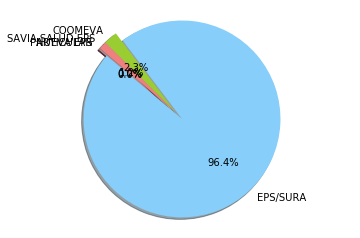

In [25]:
colors = ['lightskyblue', 'yellowgreen', 'lightcoral', 'gold','m']
explode = (0.1, 0, 0, 0, 0) 
plt.pie(Pato['health_provider'].value_counts(),labels=Pato['health_provider'].unique(), explode = explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140);
plt.axis('equal')
plt.show()

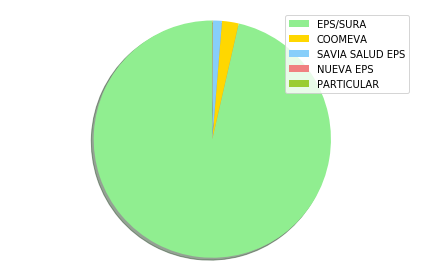

In [26]:
colors = ['lightgreen', 'gold', 'lightskyblue', 'lightcoral', 'yellowgreen'];
labels=Pato['health_provider'].unique();
patches, texts = plt.pie(Pato['health_provider'].value_counts(), colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

-----------------------

# 3. Hospitalizaciones

In [27]:
Hosp  = copy.deepcopy(data3) 

###### Rename the columns ############
Hosp.rename(columns={'Id':'id_patient',
                     'EDAD (Años)':'age',
                     'Sexo':'gender',
                         'Id Diagnostico Egreso':'diagnosis_code',
                          'Descripción diagnostico (egreso)':'diagnosis',
                          'Días de Estancia (Calculada)':'days',
                          'Dias Uci':'icu_days',
                          'Dias Uce':'scu_days',
                          'Fecha Ingreso':'in_date',
                          'Fecha Egreso': 'out_date'
                      }, 
            inplace=True)

##### Set date as pandas type ########
import xlrd
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)
Hosp['in_date'] = pd.to_datetime(Hosp['in_date'].apply(read_date), errors='coerce');
Hosp['out_date'] = pd.to_datetime(Hosp['out_date'].apply(read_date), errors='coerce');

#### Drop duplicate rows ########
Hosp.drop_duplicates(keep='first',inplace=True)
Hosp.reset_index(drop= True, inplace=True)

In [28]:
print(Hosp['diagnosis'].unique().shape[0])
print((Hosp['diagnosis_code'].unique().shape[0]))

327
317


In [29]:
Hosp['diagnosis'].head(20)

0                                                DISNEA
1                                                DISNEA
2           FIBROSIS QUÍSTICA CON OTRAS MANIFESTACIONES
3                                 ASMA, NO ESPECIFICADA
4                    APENDICITIS AGUDA, NO ESPECIFICADA
5                                       APNEA DEL SUEÑO
6     INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFI...
7     HERNIA INGUINAL UNILATERAL O NO ESPECIFICADA, ...
8                               OTRAS RINITIS ALÉRGICAS
9     ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, NO ES...
10                                      ESTADO ASMÁTICO
11                                ASMA, NO ESPECIFICADA
12                                ASMA, NO ESPECIFICADA
13                TUMOR MALIGNO DE LA GLÁNDULA TIROIDES
14    PARTO ÚNICO ESPONTÁNEO, PRESENTACIÓN CEFÁLICA ...
15    HEMORRAGIA VAGINAL Y UTERINA ANORMAL, NO ESPEC...
16    HEMORRAGIA VAGINAL Y UTERINA ANORMAL, NO ESPEC...
17                                ASMA, NO ESPEC

In [30]:
#Fill all the missing values in cod_diagnostico with their corresponding code from varius tables.
Hosp.loc[Hosp.diagnosis == 'INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFICACIÓN', 'cod_diagnostico'] = "I219"
Hosp.loc[Hosp.diagnosis == 'ASMA, NO ESPECIFICADA', 'cod_diagnostico'] = "J459"
Hosp.loc[Hosp.diagnosis == 'APENDICITIS AGUDA, NO ESPECIFICADA', 'cod_diagnostico' ] = "k359" 
Hosp.loc[Hosp.diagnosis == 'NEUMONÍA, NO ESPECIFICADA', 'cod_diagnostico' ] = "J189" 
Hosp.loc[Hosp.diagnosis == 'NEUMONÍA BACTERIANA, NO ESPECIFICADA', 'cod_diagnostico'] = "J159" 
Hosp.loc[Hosp.diagnosis == 'ESTADO ASMÁTICO', 'cod_diagnostico' ] = "J46X" 
Hosp.loc[Hosp.diagnosis == 'ASMA NO ALÉRGICA', 'cod_diagnostico' ] = "J451" 
Hosp.loc[Hosp.diagnosis == 'INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFICADO', 'cod_diagnostico' ] = "N390" 
Hosp.loc[Hosp.diagnosis == 'ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON EXACERBACIÓN AGUDA, NO ESPECIFICADA', 'cod_diagnostico'] = "J441" 
Hosp.loc[Hosp.diagnosis == 'SÍNDROME DE DIFICULTAD RESPIRATORIA DEL ADULTO', 'cod_diagnostico'] = "J80X" 
Hosp.loc[Hosp.diagnosis == 'CELULITIS DE OTROS SITIOS', 'cod_diagnostico' ] = "L038" 
Hosp.loc[Hosp.diagnosis == 'BRONQUIECTASIA',  'cod_diagnostico' ] = "J47X" 
Hosp.loc[Hosp.diagnosis == 'TUMOR MALIGNO DEL COLON, PARTE NO ESPECIFICADA',  'cod_diagnostico' ] = "C189" 
Hosp.loc[Hosp.diagnosis == 'ALERGIA NO ESPECIFICADA',  'cod_diagnostico' ] = "T784" 
Hosp.loc[Hosp.diagnosis == 'PARO RESPIRATORIO',  'cod_diagnostico'] = "R092" 
Hosp.loc[Hosp.diagnosis == 'DISNEA',  'cod_diagnostico' ] = "R060" 
Hosp.loc[Hosp.diagnosis == 'OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS', 'cod_diagnostico' ] = "R104" 
Hosp.loc[Hosp.diagnosis == 'DIABETES MELLITUS INSULINODEPENDIENTE, CON COMPLICACIONES NO ESPECIFICADAS', 'cod_diagnostico' ] = "E108" 
Hosp.loc[Hosp.diagnosis == 'ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON INFECCIÓN AGUDA DE LAS VÍAS RESPIRATORIAS INFERIORES', 'cod_diagnostico' ] = "J440" 
Hosp.loc[Hosp.diagnosis == 'HEMOPTISIS', 'cod_diagnostico' ] = "HEM" 
Hosp.loc[Hosp.diagnosis == 'ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, NO ESPECIFICADA', 'cod_diagnostico' ] = "J449" 

#Diccionario_diagnosticos  #This dictionary has the info of 'diagnostico' and 'cod_diagnostico', these two columns are basically the same.
Diccionario_diagnosticos_Hosp = Hosp.set_index('diagnosis')['diagnosis_code'].to_dict();
#Diccionario_diagnosticos_Pato = Pato.set_index('diagnostico')['cod_diagnostico'].to_dict(); #<--- have to do this before dropping the column

### z = {**x, **y}
###The desired result is to get a new dictionary (z) with the values merged, and the second dictionary's values (y) overwriting those from the first (x).
#I have a dictionary with the codes for 'diagnostico'.
Dicc_merge= {**Diccionario_diagnosticos_Hosp, **Diccionario_diagnosticos_Pato }
Dicc_merge;


In [31]:
df4 = Hosp[Hosp.isna().any(axis=1)]  
print('show dataframe with missing values.')
df4
#miss_bool = Hosp.cod_diagnostico.isnull() 
#Hosp.loc[miss_bool, 'cod_diagnostico']

show dataframe with missing values.


,id_patient,gender,age,diagnosis_code,diagnosis,icu_days,scu_days,days,in_date,out_date,cod_diagnostico
2,978163,Masculino,12,E848,FIBROSIS QUÍSTICA CON OTRAS MANIFESTACIONES,0,0,0,2019-05-23,2019-05-23,NaN
5,847758,Masculino,12,G473,APNEA DEL SUEÑO,0,0,0,2019-02-05,2019-02-05,NaN
6,1339118,Masculino,80,NaN,"INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFI...",0,0,1,2016-05-16,2016-05-17,I219
7,547351,Masculino,53,K403,"HERNIA INGUINAL UNILATERAL O NO ESPECIFICADA, ...",0,0,1,2014-08-13,2014-08-14,NaN
8,1043164,Masculino,49,J303,OTRAS RINITIS ALÉRGICAS,0,0,1,2017-07-24,2017-07-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1441,1121922,Femenino,57,M863,OSTEOMIELITIS MULTIFOCAL CRÓNICA,0,0,43,2013-09-11,2013-10-24,NaN
1442,1500207,Masculino,5,K522,COLITIS Y GASTROENTERITIS ALÉRGICAS Y DIETÉTICAS,0,0,50,2013-06-13,2013-08-02,NaN
1443,1500207,Masculino,3,K522,COLITIS Y GASTROENTERITIS ALÉRGICAS Y DIETÉTICAS,0,0,58,2011-08-31,2011-10-28,NaN
1444,1589082,Femenino,9,E106,"DIABETES MELLITUS INSULINODEPENDIENTE, CON OTR...",0,0,62,2013-03-18,2013-05-19,NaN


In [32]:
print('Number of unique values in diagnostico', Hosp['diagnosis'].unique().shape[0])
print('Number of unique values in cod_diagnostico',(Hosp['diagnosis_code'].unique().shape[0]))
reverse_dict = {}
for key, value in Diccionario_diagnosticos_Hosp.items():
    try:reverse_dict[value].append(key)
    except:reverse_dict[value] = [key]
reverse_dict;
[value for key, value in reverse_dict.items() if len(value) > 1]; ##Some diagnosticos have different special characters but ultimately have the same cod_diagnostico.
print('Some diagnosticos have different special characters but ultimately have the same cod_diagnostico.')

Number of unique values in diagnostico 327
Number of unique values in cod_diagnostico 317
Some diagnosticos have different special characters but ultimately have the same cod_diagnostico.


In [33]:
reverse_dict = {}
for key, value in Dicc_merge.items():
    try:reverse_dict[value].append(key)
    except:reverse_dict[value] = [key]
reverse_dict;
[value for key, value in reverse_dict.items() if len(value) > 1]; #Same thing happens with the merged dictionary.

In [34]:
Hosp.drop(columns=['diagnosis'], inplace=True)

In [35]:
Hosp['gender']=Hosp['gender'].astype('category');
Hosp['diagnosis_code']=Hosp['diagnosis_code'].astype('category');
Hosp

,id_patient,gender,age,diagnosis_code,icu_days,scu_days,days,in_date,out_date,cod_diagnostico
0,1381384,Femenino,43,R060,0,0,0,2020-05-22,2020-05-22,R060
1,1118363,Masculino,6,R060,0,0,0,2020-01-02,2020-01-02,R060
2,978163,Masculino,12,E848,0,0,0,2019-05-23,2019-05-23,NaN
3,1140753,Masculino,31,J459,0,0,0,2018-08-22,2018-08-22,J459
4,1226479,Femenino,19,K359,0,0,0,2018-07-03,2018-07-03,k359
...,...,...,...,...,...,...,...,...,...,...
1446,948868,Femenino,43,J46X,0,0,147,2018-11-02,2019-03-29,J46X
1447,885255,Masculino,67,J159,0,0,19,2017-01-16,2017-02-04,J159
1448,1772651,Femenino,67,J441,0,1,13,2017-02-08,2017-02-21,J441
1449,664514,Femenino,36,J459,0,0,8,2017-02-13,2017-02-21,J459


In [36]:
print(Hosp['age'].unique())
print('Number of unique values: ',len(Hosp['age'].unique()))
# I see a some age values that look like a mistake, they are not so many so I decided to ditch them.

[  43    6   12   31   19   80   53   49   78   56   58   61   55   29
   38   27   32   26   64   52   45   51   39   24   28   25   35   57
   71   73   74   60   30   47   54   40   36   48   66   50   34   44
   46   37   41   33   62   59   65   16   18    9    8   14    2    5
    0    3   23   10    1   11   21   20   17 2660   82   79   70   63
   67   72   68   75    7    4   15   22 2679   77   69   42   13   81
   76   93 2136   83]
Number of unique values:  88


In [37]:
# Get names of indexes for which column Age has value over 110.
indexNames = Hosp[ Hosp['age'] > 110 ].index
# Delete these row indexes from dataFrame
Hosp.drop(indexNames , inplace=True)
Hosp['age'].describe()

count    1445.000000
mean       37.728028
std        22.012212
min         0.000000
25%        20.000000
50%        39.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

In [38]:
Hosp

,id_patient,gender,age,diagnosis_code,icu_days,scu_days,days,in_date,out_date,cod_diagnostico
0,1381384,Femenino,43,R060,0,0,0,2020-05-22,2020-05-22,R060
1,1118363,Masculino,6,R060,0,0,0,2020-01-02,2020-01-02,R060
2,978163,Masculino,12,E848,0,0,0,2019-05-23,2019-05-23,NaN
3,1140753,Masculino,31,J459,0,0,0,2018-08-22,2018-08-22,J459
4,1226479,Femenino,19,K359,0,0,0,2018-07-03,2018-07-03,k359
...,...,...,...,...,...,...,...,...,...,...
1446,948868,Femenino,43,J46X,0,0,147,2018-11-02,2019-03-29,J46X
1447,885255,Masculino,67,J159,0,0,19,2017-01-16,2017-02-04,J159
1448,1772651,Femenino,67,J441,0,1,13,2017-02-08,2017-02-21,J441
1449,664514,Femenino,36,J459,0,0,8,2017-02-13,2017-02-21,J459


In [39]:
Hosp1 = copy.deepcopy(Hosp) 
Hosp1.set_index(['age', 'id_patient'], inplace=True)
Hosp1.sort_index(inplace=True)
Hosp1.head(30)
Hosp1.groupby('id_patient').count()
#Hosp1.reset_index(level=1)

,gender,diagnosis_code,icu_days,scu_days,days,in_date,out_date,cod_diagnostico
id_patient,,,,,,,,
500547,2,2,2,2,2,2,2,2
502989,3,3,3,3,3,3,3,1
506808,6,6,6,6,6,6,6,5
514102,12,12,12,12,12,12,12,8
524006,8,6,8,8,8,8,8,5
...,...,...,...,...,...,...,...,...
1985014,6,4,6,6,6,6,6,5
1994641,1,1,1,1,1,1,1,1
1995390,7,7,7,7,7,7,7,6


In [40]:
Hosp2 = copy.deepcopy(Hosp) 
Hosp2.set_index(['age', 'id_patient'], inplace=True)
Hosp2.sort_index(inplace=True)
Hosp2.head(30)

gender diagnosis_code  icu_days  scu_days  days    in_date  \
age id_patient                                                                  
0   596891      Masculino           P599         0         0     2 2009-10-08   
    967262      Masculino           P073         0         0     1 2009-05-18   
    967262      Masculino           P220         7         1    11 2009-05-07   
    1022147      Femenino           P073         0        16    22 2009-06-08   
    1215602     Masculino           P073         3         3     7 2014-11-04   
    1500207     Masculino           R060         0         1     2 2008-01-13   
    1500207     Masculino           Q251         2         2     6 2008-01-02   
    1548056      Femenino           P073         0         0     1 2011-09-13   
    1548056      Femenino           P229         2         0     2 2011-08-27   
    1548056      Femenino           P073         6         4    11 2011-08-29   
1   506808      Masculino           J459         0         0     3 2010-07-17   
    596891      Masculino           L048         0         0     8 2010-10-14   
    1088205      Femenino           J46X         0         0     3 2011-04-07   
    1118363     Masculino           J219         0         0     4 2014-11-15   
    1391509      Femenino           J189         0         0     4 2014-07-26   
    1391509      Femenino           Z111         0         0     7 2014-02-27   
    1500207     Masculino           N390         0         0     6 2009-06-27   
    1538712      Femenino           J46X         0         0     1 2010-11-29   
    1538712      Femenino           J180         2         1     8 2010-11-30   
2   506808      Masculino           J189         0         0     4 2011-05-29   
    506808      Masculino           J459         0         0     5 2011-01-26   
    535255       Femenino           J180         0         0     1 2009-05-07   
    535255       Femenino           J159         0         0     6 2008-09-24   
    535255       Femenino           J324         0         0    22 2009-05-08   
    653834      Masculino           B002         0         0     3 2009-01-13   
    967262      Masculino           J459         0         0     6 2012-03-16   
    1022147      Femenino           J180         0         0     4 2012-06-06   
    1088205      Femenino           J459         0         0     1 2011-11-17   
    1118363     Masculino           J459         0         0     2 2015-11-08   
    1118363     Masculino            NaN         0         0     2 2016-03-03   

                 out_date cod_diagnostico  
age id_patient                             
0   596891     2009-10-10             NaN  
    967262     2009-05-19             NaN  
    967262     2009-05-18             NaN  
    1022147    2009-06-30             NaN  
    1215602    2014-11-11             NaN  
    1500207    2008-01-15            R060  
    1500207    2008-01-08             NaN  
    1548056    2011-09-14             NaN  
    1548056    2011-08-29             NaN  
    1548056    2011-09-09             NaN  
1   506808     2010-07-20            J459  
    596891     2010-10-22             NaN  
    1088205    2011-04-10            J46X  
    1118363    2014-11-19             NaN  
    1391509    2014-07-30            J189  
    1391509    2014-03-06             NaN  
    1500207    2009-07-03             NaN  
    1538712    2010-11-30            J46X  
    1538712    2010-12-08             NaN  
2   506808     2011-06-02            J189  
    506808     2011-01-31            J459  
    535255     2009-05-08             NaN  
    535255     2008-09-30             NaN  
    535255     2009-05-30             NaN  
    653834     2009-01-16             NaN  
    967262     2012-03-22            J459  
    1022147    2012-06-10             NaN  
    1088205    2011-11-18            J459  
    1118363    2015-11-10            J459  
    1118363    2016-03-05            J451

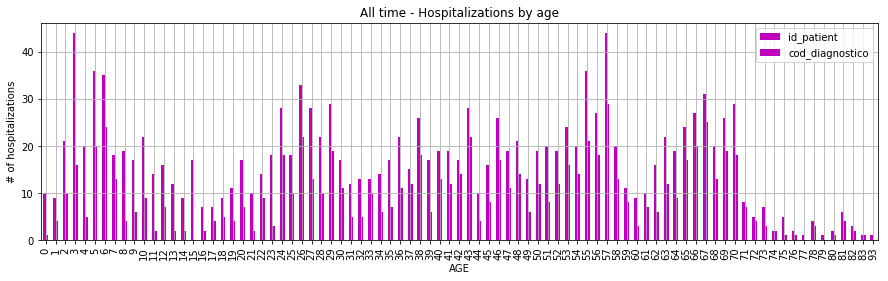

In [41]:
r = Hosp.groupby(['age']).count()
r.sort_index(inplace=True)
r.drop(columns=['gender','diagnosis_code', 'icu_days','scu_days','days','in_date','out_date'], inplace=True)
r.head(30);
bars = r.plot.bar(color='m',figsize=(15, 4), grid=(True), title='All time - Hospitalizations by age')
bars.set_xlabel("AGE");
bars.set_ylabel("# of hospitalizations");

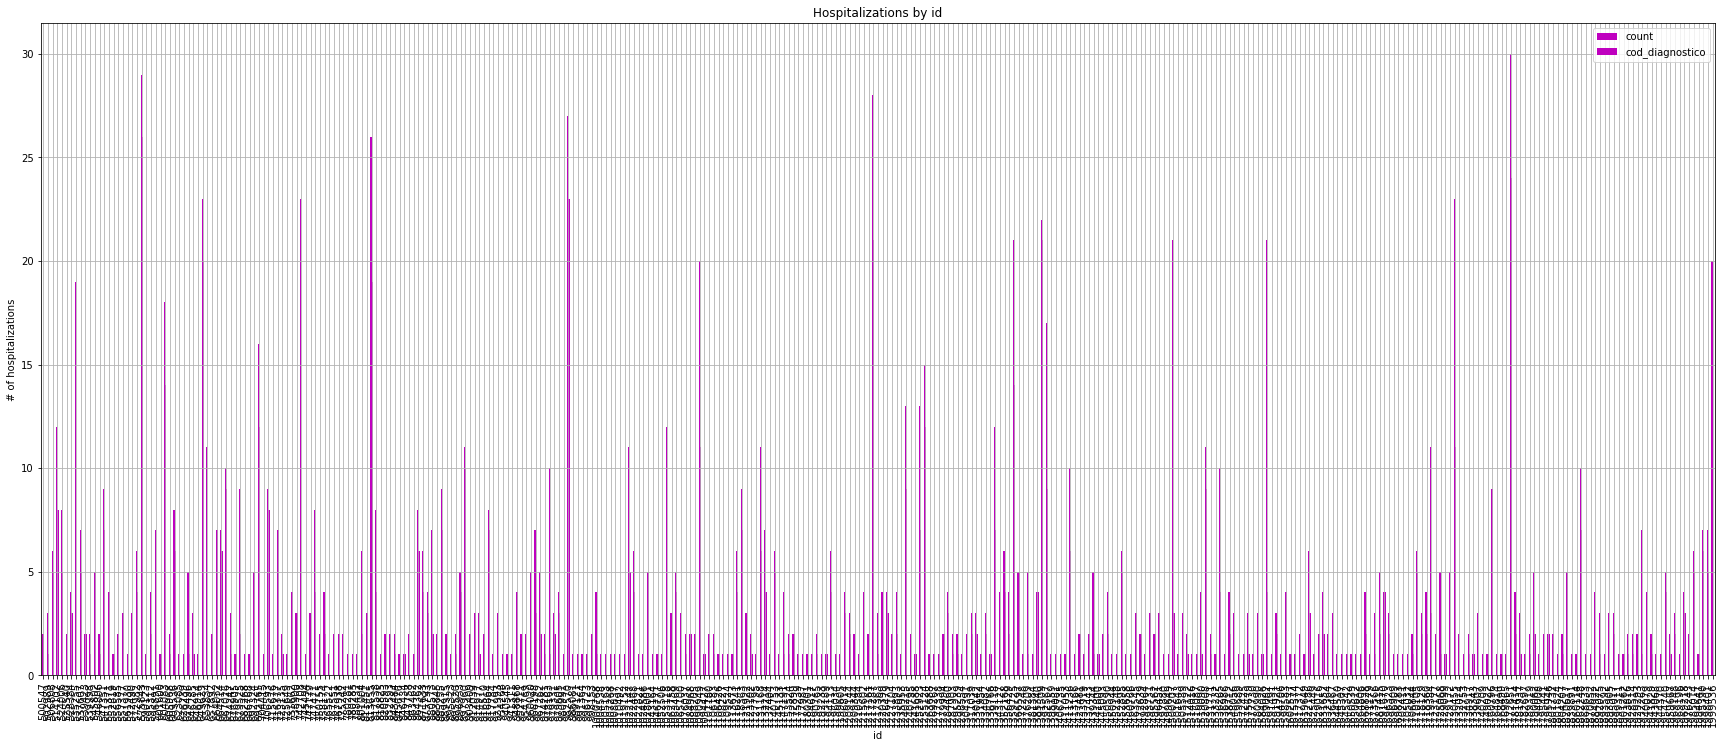

In [42]:
#Plot the number of hospitalizations per patient.
r1 = Hosp.groupby(['id_patient']).count()
r1.sort_index(inplace=True)
r1.drop(columns=['gender','diagnosis_code', 'icu_days','scu_days','days','in_date','out_date'], inplace=True)
r1.rename(columns={'age':'count'}, inplace=True)
r1.head(30);
bars1 = r1.plot.bar(color='m',figsize=(30, 12), grid=(True), title='Hospitalizations by id')
bars1.set_xlabel("id");
bars1.set_ylabel("# of hospitalizations");

I can see that just a few patients (5) have been hospitalized over 25 times each, these patients comprise the majority of hospitalizations. Meanwhile other patients have just been hospitalized once or twice.

In [43]:
r1.reset_index(inplace=True)

In [44]:
# Basic statistics on number of hospitalizations per patient.
print('Basic statistics: \n',r1['count'].describe())
print('Mode: \n',r1['count'].mode())

Basic statistics: 
 count    357.000000
mean       4.047619
std        5.102927
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       30.000000
Name: count, dtype: float64
Mode: 
 0    1
dtype: int64


In [45]:
# Total hospitalizations by gender.
r2 = Hosp.groupby(['gender']).count()
r2.drop(columns=['diagnosis_code', 'icu_days','scu_days','days','in_date','out_date'], inplace=True)
r2

,id_patient,age,cod_diagnostico
gender,,,
Femenino,1077,1077,605
Masculino,368,368,189


In [46]:
Hosp
print('Hosp:\n', Hosp['diagnosis_code'].value_counts().head(10))
print('Pato:\n', Pato['diagnosis_code'].value_counts().head(10))

Hosp:
 J459    279
J46X    178
J189     81
J441     64
J159     37
N390     32
J180     31
J450     30
O800     23
E840     22
Name: diagnosis_code, dtype: int64
Pato:
 J450    386
J459    291
L509    155
I10X     79
J304     72
L501     69
L500     68
L508     65
J449     49
J458     42
Name: diagnosis_code, dtype: int64


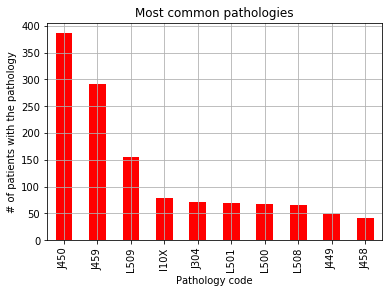

In [47]:
patoplot = Pato['diagnosis_code'].value_counts().head(10)
patoplot = patoplot.plot.bar(color='r', grid=(True), title='Most common pathologies');
patoplot.set_xlabel("Pathology code");
patoplot.set_ylabel("# of patients with the pathology");

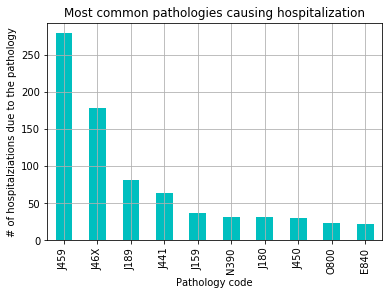

In [48]:
Hospplot = Hosp['diagnosis_code'].value_counts().head(10)
Hospplot = Hospplot.plot.bar(color='c', grid=(True), title='Most common pathologies causing hospitalization');
Hospplot.set_xlabel("Pathology code");
Hospplot.set_ylabel("# of hospitalziations due to the pathology");

________________________________________________________

In [49]:
Adher

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
0,529410,2012-04-19,no,si,95-100%,no,6.0,no,95-100%
1,1101180,2012-04-24,no,si,95-100%,no,4.0,no,95-100%
2,1053118,2012-05-03,no,si,95-100%,no,6.0,no,95-100%
3,1198956,2012-05-16,no,si,95-100%,no,6.0,no,95-100%
4,605968,2012-05-17,no,si,95-100%,no,5.0,no,95-100%
...,...,...,...,...,...,...,...,...,...
5222,1126622,2020-05-20,si,si,95-100%,si,6.0,si,95-100%
5223,628557,2020-05-21,si,si,95-100%,si,6.0,si,95-100%
5224,1970331,2020-05-21,si,si,95-100%,si,6.0,si,95-100%
5225,1519090,2020-05-21,si,si,95-100%,si,6.0,si,95-100%


In [50]:
adherence_reported_twice_same_date = Adher.groupby(['id_patient', 'survey_date']).size().reset_index()[Adher.groupby(['id_patient', 'survey_date']).size().reset_index()[0] > 1]
adherence_reported_twice_same_date

,id_patient,survey_date,0
374,622031,2018-05-24,2
498,667026,2013-04-17,2
1367,916510,2017-02-07,2
2741,1356429,2014-09-30,2
3031,1445093,2020-04-17,2
4066,1760796,2019-04-30,2
4259,1801824,2018-01-25,2
4722,1995390,2015-04-17,2


In [51]:
for _, row in adherence_reported_twice_same_date.iterrows():
#     display(row)
    display(Adher[(Adher['id_patient']==row['id_patient']) & (Adher['survey_date']==row['survey_date'])])

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
3188,622031,2018-05-24,si,si,95-100%,si,5.0,si,95-100%
3189,622031,2018-05-24,si,si,95-100%,si,6.0,si,95-100%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
102,667026,2013-04-17,no,no,85-94%,no,5.0,no,85-94%
103,667026,2013-04-17,no,no,<30%,si,6.0,no,<30%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
1985,916510,2017-02-07,no,no,95-100%,si,5.0,no,95-100%
1988,916510,2017-02-07,si,si,95-100%,si,6.0,si,95-100%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
630,1356429,2014-09-30,si,si,95-100%,si,6.0,si,95-100%
633,1356429,2014-09-30,si,no,<30%,no,5.0,no,<30%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
5098,1445093,2020-04-17,si,si,95-100%,si,6.0,si,95-100%
5099,1445093,2020-04-17,si,si,95-100%,si,5.0,si,95-100%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
4135,1760796,2019-04-30,no,no,30-65%,si,6.0,no,30-65%
4136,1760796,2019-04-30,si,si,95-100%,si,6.0,si,95-100%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
2811,1801824,2018-01-25,no,no,95-100%,no,5.0,no,95-100%
2813,1801824,2018-01-25,no,no,95-100%,si,6.0,no,95-100%


,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
842,1995390,2015-04-17,si,si,95-100%,si,6.0,si,95-100%
843,1995390,2015-04-17,si,si,95-100%,si,5.0,si,95-100%


In [52]:
Adher = Adher.drop_duplicates(['id_patient', 'survey_date'], keep='last')

In [53]:
conflict_id = 916510
Adher[(Adher['id_patient']==conflict_id)]

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
832,916510,2015-04-08,si,si,95-100%,si,6.0,si,95-100%
997,916510,2015-08-27,si,si,95-100%,si,6.0,si,95-100%
1227,916510,2015-12-30,si,si,95-100%,si,6.0,si,95-100%
1352,916510,2016-02-25,no,no,<30%,si,6.0,no,<30%
1383,916510,2016-03-09,si,si,95-100%,si,6.0,si,95-100%
1396,916510,2016-03-23,si,si,95-100%,si,6.0,si,95-100%
1431,916510,2016-04-20,si,si,95-100%,si,6.0,si,95-100%
1455,916510,2016-05-18,si,si,95-100%,si,6.0,si,95-100%
1513,916510,2016-06-30,si,si,95-100%,si,6.0,si,95-100%
1626,916510,2016-09-14,si,si,95-100%,si,6.0,si,95-100%


In [54]:
# Adher
Adher.to_csv('./data/cleansed/Adher.csv', index=False)

In [55]:
# Hosp
Hosp.to_csv('./data/cleansed/Hosp.csv', index=False)
Hosp.groupby('id_patient').count()

,gender,age,diagnosis_code,icu_days,scu_days,days,in_date,out_date,cod_diagnostico
id_patient,,,,,,,,,
500547,2,2,2,2,2,2,2,2,2
502989,3,3,3,3,3,3,3,3,1
506808,6,6,6,6,6,6,6,6,5
514102,12,12,12,12,12,12,12,12,8
524006,8,8,6,8,8,8,8,8,5
...,...,...,...,...,...,...,...,...,...
1985014,6,6,4,6,6,6,6,6,5
1994641,1,1,1,1,1,1,1,1,1
1995390,7,7,7,7,7,7,7,7,6


In [56]:
# Pato
Pato.to_csv('./data/cleansed/Pato.csv', index=False)